In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_table('diabetes2.txt',sep=',',names = None)

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [6]:
df1 = df.drop('Outcome',axis=1)
df1.replace(0,np.nan,inplace=True)
df1.fillna(df1.median(),inplace = True)

In [7]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.00,148.00,72.00,35.00,125.00,33.60,0.63,50
1,1.00,85.00,66.00,29.00,125.00,26.60,0.35,31
2,8.00,183.00,64.00,29.00,125.00,23.30,0.67,32
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21
4,4.00,137.00,40.00,35.00,168.00,43.10,2.29,33
...,...,...,...,...,...,...,...,...
763,10.00,101.00,76.00,48.00,180.00,32.90,0.17,63
764,2.00,122.00,70.00,27.00,125.00,36.80,0.34,27
765,5.00,121.00,72.00,23.00,112.00,26.20,0.24,30
766,1.00,126.00,60.00,29.00,125.00,30.10,0.35,47


In [8]:
X_train,X_test,y_train,y_test = train_test_split(df1,df['Outcome'],test_size=0.2,random_state=2);

In [9]:
X = X_train.values
X = X.T
m_train = X.shape[1]
n_features = X.shape[0]

In [10]:
y = np.zeros((1,m_train))
y = y_train.values

In [11]:
W = np.zeros((1,n_features))

In [12]:
b=np.zeros((1,m_train));

In [13]:
b.shape

(1, 614)

In [14]:
n_epoch = 10000
learning_rate= 0.0001

In [15]:
# Vectorized Implementation
costs = []
for i in range(n_epoch):
    Z = np.dot(W,X)+b
    A = expit(Z)
    dZ = A - y
    u = 1.* (A>0.5) - y
    cost = -1/m_train * np.sum(y * np.log(A) + (1-y) * (np.log(1-A)))
#     C = y*np.log(a)+(1-y)*np.log(1-a)
    costs.append(cost);
    print(*["At Epoch",i,"Error:",(1/m_train)*(np.sum(u**2)),"Correctedness:",1-(1/m_train)*(np.sum((u**2)))])
    db = (1.0/m_train)*np.sum(dZ)
    dW = (1.0/m_train)*np.dot(dZ,X.T)
    assert(dW.shape==W.shape)
    assert(dZ.shape==Z.shape)
    W = W - learning_rate*dW;
    b = b - learning_rate*db;
print(W);
print(b[0,0]);

At Epoch 0 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 1 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 2 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 3 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 4 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 5 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 6 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 7 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 8 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 9 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 10 Error: 0.36319218241042345 Correctedness: 0.6368078175895766
At Epoch 11 Error: 0.36156351791530944 Correctedness: 0.6384364820846906
At Epoch 12 Error: 0.36156351791530944 Correctedness: 0.6384364820846906
At Epoch 13 Error: 0.36156351791530944 Correctedness: 0.63843

At Epoch 288 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 289 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 290 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 291 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 292 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 293 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 294 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 295 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 296 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 297 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 298 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 299 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 300 Error: 0.30456026058631924 Correctedness: 0.6954397394136808
At Epoch 301 Error: 0.3045602605863192

At Epoch 633 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 634 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 635 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 636 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 637 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 638 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 639 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 640 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 641 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 642 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 643 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 644 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 645 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 646 Error: 0.2996742671009772 Correc

At Epoch 894 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 895 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 896 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 897 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 898 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 899 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 900 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 901 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 902 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 903 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 904 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 905 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 906 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 907 Error: 0.2964169381107492 Correctednes

At Epoch 1240 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1241 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1242 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1243 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1244 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1245 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1246 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1247 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1248 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1249 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1250 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1251 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1252 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 1253 Error: 0.298045602605863

At Epoch 1518 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1519 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1520 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1521 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1522 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1523 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1524 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1525 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1526 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1527 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1528 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1529 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1530 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1531 Error: 0.30

At Epoch 1912 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1913 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1914 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1915 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1916 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1917 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1918 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1919 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1920 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1921 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1922 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1923 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1924 Error: 0.30618892508143325 Correctedness: 0.6938110749185668
At Epoch 1925 Error: 0.30

At Epoch 2229 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2230 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2231 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2232 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2233 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2234 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2235 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2236 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2237 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2238 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2239 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2240 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2241 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2242 Error: 0.30

At Epoch 2521 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2522 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2523 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2524 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2525 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2526 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2527 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2528 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2529 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2530 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2531 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2532 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2533 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2534 Error: 0.30

At Epoch 2859 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2860 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2861 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2862 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2863 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 2864 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2865 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2866 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2867 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2868 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2869 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2870 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2871 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 2872 Error: 0.30

At Epoch 3168 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3169 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3170 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3171 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3172 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3173 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3174 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3175 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3176 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3177 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3178 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3179 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3180 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 3181 Error: 0.30

At Epoch 3451 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3452 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3453 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3454 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3455 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3456 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3457 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3458 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3459 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3460 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3461 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3462 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3463 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 3464 Error: 0.299674267100977

At Epoch 3733 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3734 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3735 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3736 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3737 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3738 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3739 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3740 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3741 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3742 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3743 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3744 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3745 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 3746 Error: 0.298045602605863

At Epoch 4088 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4089 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4090 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4091 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4092 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4093 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4094 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4095 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4096 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4097 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4098 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4099 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4100 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4101 Error: 0.298045602605863

At Epoch 4409 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4410 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4411 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4412 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4413 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4414 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4415 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4416 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4417 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4418 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4419 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4420 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4421 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4422 Error: 0.299674267100977

At Epoch 4669 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4670 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4671 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4672 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4673 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4674 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4675 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4676 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4677 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4678 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4679 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4680 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4681 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 4682 Error: 0.299674267100977

At Epoch 4983 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4984 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4985 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4986 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4987 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4988 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4989 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4990 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4991 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4992 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4993 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4994 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4995 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 4996 Error: 0.298045602605863

At Epoch 5248 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5249 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5250 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5251 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5252 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5253 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5254 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5255 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5256 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5257 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5258 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5259 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5260 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 5261 Error: 0.296416938110749

At Epoch 5622 Error: 0.2980456026058632 Correctedness: 0.7019543973941368
At Epoch 5623 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5624 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5625 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5626 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5627 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5628 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5629 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5630 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5631 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5632 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5633 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5634 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 5635 Error: 0.299674267100977

At Epoch 5869 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5870 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5871 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5872 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5873 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5874 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5875 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5876 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5877 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5878 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5879 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5880 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5881 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 5882 Error: 0.30

At Epoch 6233 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6234 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6235 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6236 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6237 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6238 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6239 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6240 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6241 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6242 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6243 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6244 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6245 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6246 Error: 0.30

At Epoch 6487 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6488 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6489 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6490 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6491 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6492 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6493 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6494 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6495 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6496 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6497 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6498 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6499 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6500 Error: 0.30

At Epoch 6777 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6778 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6779 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6780 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6781 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6782 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6783 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6784 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6785 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6786 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6787 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6788 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6789 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 6790 Error: 0.30

At Epoch 7151 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7152 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7153 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7154 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7155 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7156 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7157 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7158 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7159 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7160 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7161 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7162 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7163 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7164 Error: 0.30

At Epoch 7452 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7453 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7454 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7455 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7456 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7457 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7458 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7459 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7460 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7461 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7462 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7463 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7464 Error: 0.30293159609120524 Correctedness: 0.6970684039087948
At Epoch 7465 Error: 0.30

At Epoch 7785 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7786 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7787 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7788 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7789 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7790 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7791 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7792 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7793 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7794 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7795 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7796 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7797 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 7798 Error: 0.30

At Epoch 8036 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8037 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8038 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8039 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8040 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8041 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8042 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8043 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8044 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8045 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8046 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8047 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8048 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8049 Error: 0.299674267100977

At Epoch 8338 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8339 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8340 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8341 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8342 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8343 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8344 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8345 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8346 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8347 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8348 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8349 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8350 Error: 0.2996742671009772 Correctedness: 0.7003257328990228
At Epoch 8351 Error: 0.299674267100977

At Epoch 8607 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8608 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8609 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8610 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8611 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8612 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8613 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8614 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8615 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8616 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8617 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8618 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8619 Error: 0.30130293159609123 Correctedness: 0.6986970684039088
At Epoch 8620 Error: 0.30

At Epoch 8951 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8952 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8953 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8954 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8955 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8956 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8957 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8958 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8959 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8960 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8961 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8962 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8963 Error: 0.2964169381107492 Correctedness: 0.7035830618892508
At Epoch 8964 Error: 0.296416938110749

At Epoch 9203 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9204 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9205 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9206 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9207 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9208 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9209 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9210 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9211 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9212 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9213 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9214 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9215 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9216 Error: 0.294788273615635

At Epoch 9519 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9520 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9521 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9522 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9523 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9524 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9525 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9526 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9527 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9528 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9529 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9530 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9531 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9532 Error: 0.294788273615635

At Epoch 9845 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9846 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9847 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9848 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9849 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9850 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9851 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9852 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9853 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9854 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9855 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9856 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9857 Error: 0.2947882736156352 Correctedness: 0.7052117263843648
At Epoch 9858 Error: 0.294788273615635

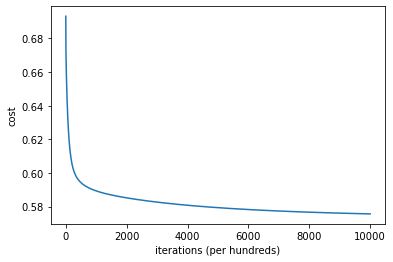

In [16]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()

In [17]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

print(reg.intercept_,reg.coef_,reg.score(X_train,y_train))

# now we have coefficients we can try on test 

[-8.3488289] [[ 0.15492666  0.03776964 -0.01093728  0.00566077 -0.00122732  0.07810007
   0.70963094  0.00773646]] 0.7768729641693811


C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
X2 = X_test.values
X2 = X2.T
X2.shape
m_test = X2.shape[1]
print(m_test)
n_features = X2.shape[0]


154


In [19]:
y2 = np.zeros((1,m_test))
y2[0] = y_test.values
y2.reshape(1,m_test)

array([[0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [20]:
b2 = 0
Z = np.dot(W,X2)+b2;
A = expit(Z);
dZ = A - y2;
u = 1.*(A>0.5)-y2
print(*["Accuracy of the model:",1-(1/m_test)*(np.sum((u**2)))])

Accuracy of the model: 0.7012987012987013


In [21]:
print(reg.score(X_test,y_test))

0.7662337662337663


# Plotting Cost funciton

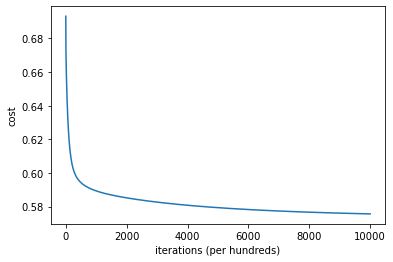

In [22]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()